In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model = MobileNetV2(weights='imagenet')

import cv2
import numpy as np


def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # ★● Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)



def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    frames = preprocess_input(frames)
    predictions = model.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)

    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

# Replace with your video path
video_path = "/content/drive/MyDrive/real_world_demo_video.mp4"
classify_video(video_path)


Extracted frames: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
digital_clock : 63.84 %
traffic_light : 9.13 %
switch : 1.43 %
computer_keyboard : 1.32 %
matchstick : 0.85 %
Final Prediction: digital_clock


In [ ]:
import matplotlib.pyplot as plt

# Extract frames from the video
video_path = "/content/drive/MyDrive/real_world_demo_video.mp4"
extracted_frames = extract_frames(video_path)

print(f"Total frames extracted: {len(extracted_frames)}")

Extracted frames: 20
Total frames extracted: 20


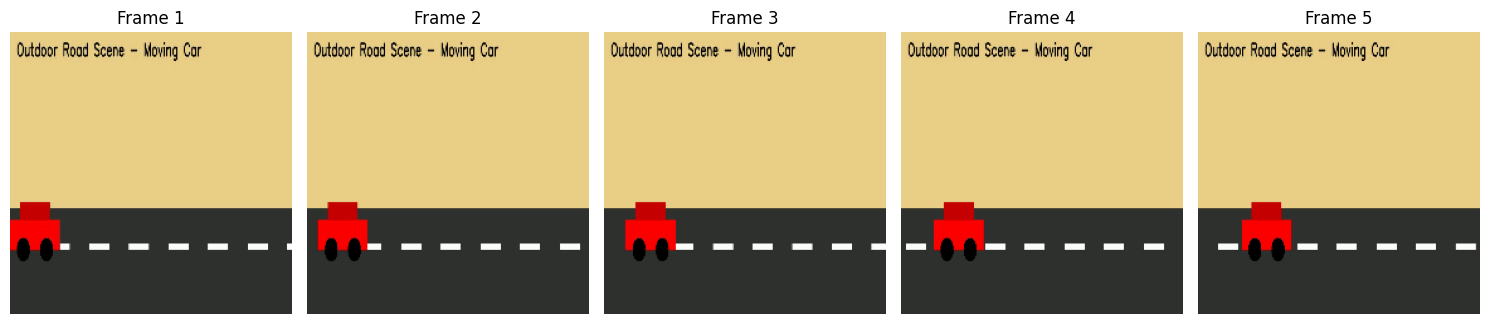

In [ ]:
if len(extracted_frames) > 0:
    # Display the first 5 frames as an example
    num_frames_to_display = min(5, len(extracted_frames))
    plt.figure(figsize=(15, 5))
    for i in range(num_frames_to_display):
        plt.subplot(1, num_frames_to_display, i + 1)
        plt.imshow(extracted_frames[i])
        plt.title(f"Frame {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No frames available to display.")

In [ ]:
# Display the shape and data type of the extracted frames array
print(f"Shape of extracted_frames: {extracted_frames.shape}")
print(f"Data type of extracted_frames: {extracted_frames.dtype}")

# Display the pixel values for a small region (e.g., top-left 5x5 pixels) of the first frame
# extracted_frames[frame_index, row_start:row_end, col_start:col_end, channel]
print("\nPixel values for the top-left 5x5 region of the first frame (RGB channels):")
print(extracted_frames[0, 0:5, 0:5, :])


Shape of extracted_frames: (20, 224, 224, 3)
Data type of extracted_frames: uint8

Pixel values for the top-left 5x5 region of the first frame (RGB channels):
[[[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]]


The output above shows:
- **Shape:** `(20, 224, 224, 3)` means there are 20 frames, each 224 pixels high, 224 pixels wide, and 3 color channels (RGB).
- **Data type:** `uint8` indicates that each pixel value is an 8-bit unsigned integer, ranging from 0 to 255.
- **Pixel values:** A 5x5 matrix of pixel values for the top-left corner of the first frame. Each inner array `[R, G, B]` represents the red, green, and blue intensity for a single pixel.